In [1]:
from __future__ import division
import matplotlib
from pylab import *
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress
from scipy.signal import argrelextrema
import numpy as np
import pandas as pd
import math
from ddeint import ddeint
import copy

# 1 Load data

In [2]:
import scipy
import scipy.io as sio


In [3]:
df11=pd.read_csv('../data/20220624_ODphage_calibration_LE392_Nam7Sam7.csv',delimiter=',',index_col=0, ) 

ydata1 = df11.loc['C7'].to_numpy()
ydata2 = df11.loc['C8'].to_numpy()

ydata3 = df11.loc['F7'].to_numpy()
ydata4 = df11.loc['F8'].to_numpy()

ymean11 = (ydata1+ydata2)/2; 
ymean12 = (ydata3+ydata4)/2; 

df_N = pd.DataFrame(columns=df11.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_N.loc[idx_] = df11.loc[idx_] - ymean11;
df_N.loc['Time'] = df11.iloc[0]/60
        
df_S = pd.DataFrame(columns=df11.columns); 
for i in ['D','E','F']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_S.loc[idx_] = df11.loc[idx_] - ymean12;
df_S.loc['Time'] = df11.iloc[0]/60

In [4]:
df11=pd.read_csv('../data/20220625_ODphage_calibration_LE392_Pam80_IG2903.csv',delimiter=',',index_col=0, ) 

ydata1 = df11.loc['C7'].to_numpy()
ydata2 = df11.loc['C8'].to_numpy()

ydata3 = df11.loc['F7'].to_numpy()
ydata4 = df11.loc['F8'].to_numpy()

ymean11 = (ydata1+ydata2)/2; 
ymean12 = (ydata3+ydata4)/2; 

df_PMinus = pd.DataFrame(columns=df11.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_PMinus.loc[idx_] = df11.loc[idx_] - ymean11;
df_PMinus.loc['Time'] = df11.iloc[0]/60
        
df_PPlus = pd.DataFrame(columns=df11.columns); 
for i in ['D','E','F']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_PPlus.loc[idx_] = df11.loc[idx_] - ymean12;
df_PPlus.loc['Time'] = df11.iloc[0]/60

In [5]:
row_idx = [];
for i in ['A','B','C','D','E','F']:
    for j in np.arange(1,9,1):
        row_idx.append(i+str(j))
row_idx.append('Time')

In [6]:
filename_OD = '../data/d20220817_ODphagecounting_M9Glu.mat';
mat_contents = sio.loadmat(filename_OD)
time_ = mat_contents['timeVector'][0]

df_glu = pd.DataFrame(mat_contents['blankedOD'])
df_glu.loc['Time'] = time_
df_glu.index = row_idx

In [7]:
filename_OD = '../data/d20220817_ODphagecounting_M9Mal.mat';
mat_contents = sio.loadmat(filename_OD)
time_ = mat_contents['timeVector'][0]

df_mal = pd.DataFrame(mat_contents['blankedOD'])
df_mal.loc['Time'] = time_
df_mal.index = row_idx

In [8]:
filename_OD = '../data/d20220901_ODphagecounting_TBM.mat';
mat_contents = sio.loadmat(filename_OD)
time_ = mat_contents['timeVector'][0]

df_TBM = pd.DataFrame(mat_contents['blankedOD'])
df_TBM.loc['Time'] = time_
df_TBM.index = row_idx

In [9]:
filename_OD = '../data/d20221116_ODphagecalibration_LBM_run1_220414.mat';
mat_contents = sio.loadmat(filename_OD)
time_ = mat_contents['timeVector'][0]

df_831 = pd.DataFrame(mat_contents['blankedOD'])
df_831.loc['Time'] = time_
df_831.index = row_idx

In [10]:
df=pd.read_csv('../data/TECAN_230119.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata2+ydata4)/2; 

df_2903 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C','D','E','F']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_2903.loc[idx_] = df.loc[idx_] - ymean;
df_2903.loc['Time'] = df.iloc[0]/60

In [11]:
df=pd.read_csv('../data/TECAN_240130.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata1+ydata2+ydata3+ydata4)/4; 

df_T5 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_T5.loc[idx_] = df.loc[idx_] - ymean;
df_T5.loc['Time'] = df.iloc[0]/60


#05_precision_and_accuracy_v2_T5 [6]

In [12]:
df=pd.read_csv('../data/TECAN_230629.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['C7'].to_numpy()
ydata2 = df.loc['C8'].to_numpy()
ymean = np.repeat(np.median((ydata1+ydata2)/2), len(ydata1)); 

df_T4 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_T4.loc[idx_] = df.loc[idx_] - ymean;
df_T4.loc['Time'] = df.iloc[0]/60

In [13]:
df=pd.read_csv('../data/TECAN_240201.csv',delimiter=',',index_col=0)  

ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata1+ydata2+ydata3+ydata4)/4; 

df_P1 = pd.DataFrame(columns=df.columns); 
for i in ['A','B','C']:
    for j in np.arange(1,9,1):
        idx_ = i+str(j)
        df_P1.loc[idx_] = df.loc[idx_] - ymean;
df_P1.loc['Time'] = df.iloc[0]/60

#05_precision_and_accuracy_v2_P1 [6]

# 2 Sfig2: growth curve

λ Nam7 P1-parS infecting LE392, stock level is 6.5e8 PFU/mL. [1.3e7, 1.3e6, 1.3e5, 1.3e4]

λ cI857 Sam7 P1-parS infecting LE392, stock level is 3.5e11 PFU/mL. [7e9, 7e8, 7e7, 7e6, 7e5, 7e4]

λ cI857 Pam80 P1-parS infecting LE392, stock level is 7.7e9 PFU/mL [1.5e8, 1.5e7, 1.5e6, 1.5e5, 1.5e4]

λIG2903 (P+) infecting LE392, stock level is 3.7e10 PFU/mL [7e8, 7e7, 7e6, 7e5, 7e4]

For T4, the stock level is 1.4e11 PFU/mL, then 10-fold down [2.8e9, 2.8e8, 2.8e7, 2.8e6, 2.8e5, 2.8e4]

For T5, the stock level is 8.3e10 PFU/mL, then 10-fold down [1.6e9, 1.6e8, 1.6e7, 1.6e6, 1.6e5, 1.6e4]

For P1, the stock level is 2.8e10 PFU/mL, then 10-fold down [5.5e8, 5.5e7, 5.5e6, 5.5e5, 5.5e4]

In [14]:
idx_2903 = 'D5'; #1.2e4

idx_TMB = 'B1' #7e4
idx_glu = 'B1' #7e4
idx_mal = 'B1' #7e4
idx_p1 = 'B1' #5.5e4

idx_831 = 'E1' #3.4e4
idx_t4 = 'B3' #2.8e4
idx_t5 = 'B3' #1.6e4

idx_N = 'A7' #1.3e4
idx_S = 'E3' #7e4
idx_PMinus = 'B1' #1.5e4
idx_PPlus = 'E1' #7e4



#idx_T4

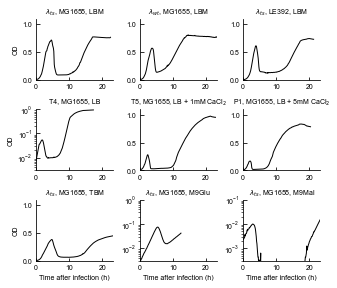

In [15]:
fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({"figure.figsize": (6,5)})

j = 0; 
idx_arr = [idx_2903, idx_831, idx_PPlus, \
           idx_t4, idx_t5, idx_p1, \
           idx_TMB, idx_glu, idx_mal];
titles = ['$\lambda_{ts}$, MG1655, LBM', '$\lambda_{wt}$, MG1655, LBM','$\lambda_{ts}$, LE392, LBM',\
          'T4, MG1655, LB', 'T5, MG1655, LB + 1mM CaCl$_2$','P1, MG1655, LB + 5mM CaCl$_2$',\
          '$\lambda_{ts}$, MG1655, TBM','$\lambda_{ts}$, MG1655, M9Glu', '$\lambda_{ts}$, MG1655, M9Mal']; 

n_plot = [1,2,3, \
          5,6,7, \
          9,10,11]; 

for df_tmp in (df_2903, df_831, df_PPlus, df_T4, df_T5, df_P1, df_TBM, df_glu, df_mal):
    ax = plt.subplot(4,4,n_plot[j])
    plt.title(titles[j])
    
    if j == 0:
        xdata_ = (df_tmp.loc['Time'][7:] - df_tmp.loc['Time'][7])/60; #hour
        ydata_ = df_tmp.loc[idx_arr[j]][7:];
    else:
        xdata_ = (df_tmp.loc['Time'][6:] - df_tmp.loc['Time'][6])/60; #hour
        ydata_ = df_tmp.loc[idx_arr[j]][6:];
    plt.plot(xdata_, ydata_,'-',linewidth=1,color='k',linestyle='-',zorder=15)
    
    if j >= 6:
        plt.xlabel('Time after infection (h)')
    if j == 0 or j == 3 or j == 6:
        plt.ylabel('OD')
    plt.xlim((0,1400/60))
    plt.ylim((0,1.1))
    if j == 3:
        #plt.ylim((0,1.1))
        plt.yscale('log')
        plt.ylim((3e-3, 1e0))
    elif j == 7:
        plt.yscale('log')
        plt.ylim((3e-3, 1e0))
    elif j == 8:
        plt.yscale('log')
        plt.ylim((3e-4, 1e-1))
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis="y",direction="in")
    ax.tick_params(axis="x",direction="in")
    
    j = j+1;
plt.tight_layout() 
plt.savefig('../output/Sfig2.pdf', format='pdf', bbox_inches='tight')

### export source file

In [16]:
import xlsxwriter
workbook = xlsxwriter.Workbook("../output/Sfig2.xlsx")
writer = pd.ExcelWriter("../output/Sfig2.xlsx", engine = 'xlsxwriter')

j = 0; 
idx_arr = [idx_2903, idx_831, idx_PPlus, \
           idx_t4, idx_t5, idx_p1, \
           idx_TMB, idx_glu, idx_mal];
titles = ['lambda_ts, MG1655, LBM', 'lambda_wt, MG1655, LBM','lambda_ts, LE392, LBM',\
          'T4, MG1655, LB', 'T5, MG1655, LB + 1mM CaCl2','P1, MG1655, LB + 5mM CaCl2',\
          'lambda_ts, MG1655, TBM','lambda_ts, MG1655, M9Glu', 'lambda_ts, MG1655, M9Mal']; 

n_plot = [1,2,3, \
          5,6,7, \
          9,10,11]; 

for df_tmp in (df_2903, df_831, df_PPlus, df_T4, df_T5, df_P1, df_TBM, df_glu, df_mal):
    
    if j == 0:
        xdata_ = (df_tmp.loc['Time'][7:] - df_tmp.loc['Time'][7])/60; #hour
        ydata_ = df_tmp.loc[idx_arr[j]][7:];
    else:
        xdata_ = (df_tmp.loc['Time'][6:] - df_tmp.loc['Time'][6])/60; #hour
        ydata_ = df_tmp.loc[idx_arr[j]][6:];
    
    dftmptmp = pd.DataFrame({'Time (h)': xdata_, 'blank-subtracted OD': ydata_}, \
                            columns=['Time (h)', 'blank-subtracted OD'])
    dftmptmp = dftmptmp.T
    dftmptmp.to_excel(writer, sheet_name = titles[j])
    
    
    j = j+1;

writer.close()

# 3 Sfig3: calibration curve

In [17]:
from matplotlib.pyplot import cm
colors=cm.turbo.reversed()(np.linspace(0,1,10))

### 3.1 lambda 831, LBM

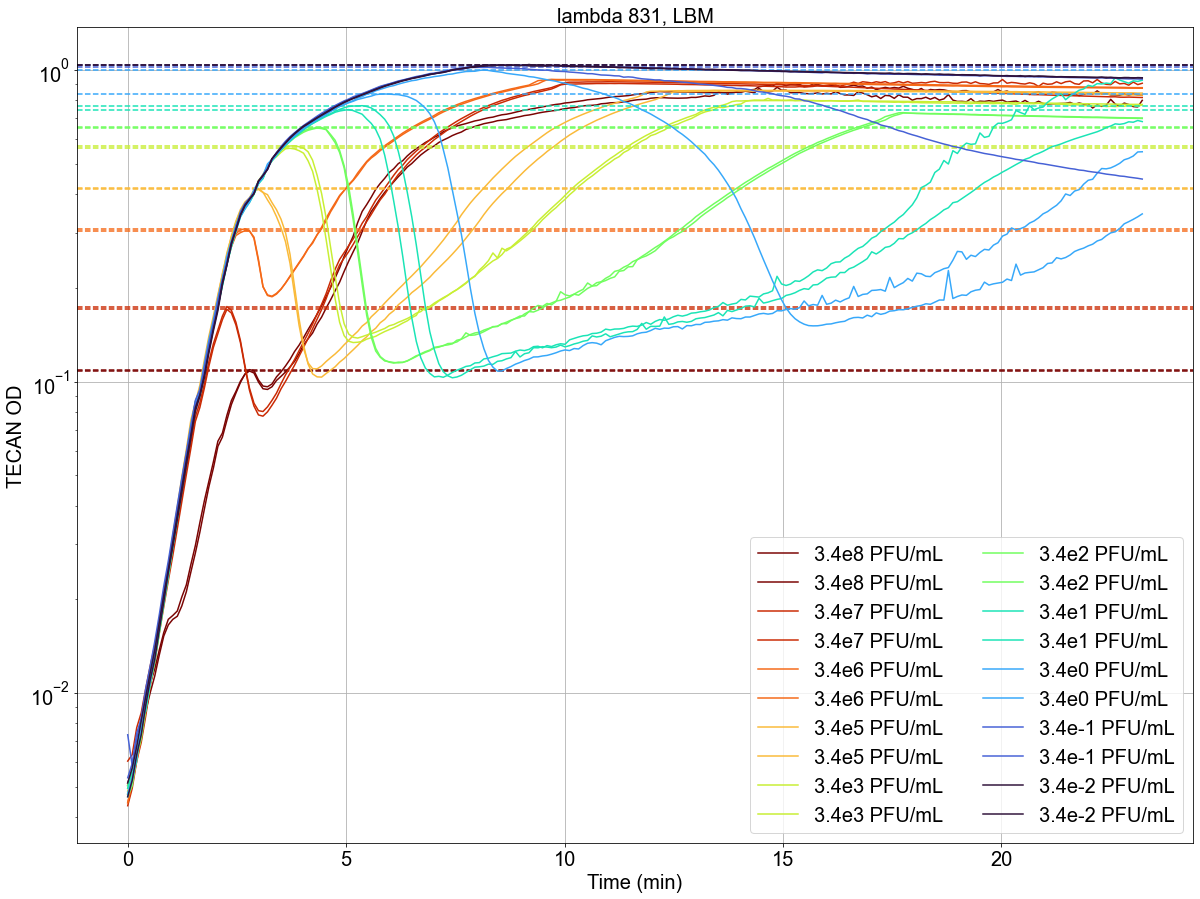

In [18]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})
labels = ['3.4e8', '3.4e7', '3.4e6', '3.4e5',\
          '3.4e3','3.4e2', '3.4e1', '3.4e0', \
         '3.4e-1', '3.4e-2', 'uninfected']

k = 0; 
for label_ in np.arange(10,0,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([24+2*k, 24+2*k+1]);
    
    for j in j_index:
        x_ = (df_831.loc['Time'].to_numpy()[6:] - df_831.loc['Time'].to_numpy()[6])/60
        y_ = df_831.iloc[j][6:].to_numpy()
        if k == 1:
            y_tmp = y_[(x_>1)]
            y_tmp2 = y_[(x_>1) & (x_ < 4)]; 
            idx = np.argmax(y_tmp2)
        elif k == 8:
            y_tmp = y_[(x_>1)] 
            idx = np.argmax(y_tmp)
        else:
            y_tmp = y_[x_>150/60]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp);
        plt.plot(x_, y_, color = colors[k,:], label=labels[k]+' PFU/mL')
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[label_] = OD; 
    time_01[label_] = time_;
    idx_01[label_] = indx_; 
    k = k+1; 
plt.title('lambda 831, LBM')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:233: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:194: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(
/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/turtle/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a maske

-0.1209371687007021
0.003997512456414353
=====
1.2109513307774273
0.02774652508001528


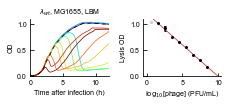

In [19]:
import xlsxwriter
# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3b.xlsx")
writer = pd.ExcelWriter("../output/Sfig3b.xlsx", engine = 'xlsxwriter')

######################################

def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,0,-1); 

matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]);

######################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
######################################
for i in phage_range:
    phage = 0.34*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ######################################
        plty_all = np.array([]);
        ######################################
        
        for j in OD_01[i]:   
            
            ######################################
            plty_all = np.append(plty_all, j);
            ######################################
            if i < 2:
                plt.plot(np.log10(phage), j, 'o', markersize=2, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i == 7:    
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,label='Experiment',zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        
        ######################################
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################
        
######################################        
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', 'Lysis OD (mean)','Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'b-right')
######################################    

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{wt}$, MG1655, LBM')
x_ = df_831.loc['Time'].to_numpy(); 

######################################    
dftmptmp = pd.DataFrame();
######################################    

for j in ['F5','F6']:
    y_ = df_831.loc[j].to_numpy(); 
    if j == 'F5':
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################    
        
    #else:
        #plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([24+2*k, 24+2*k+1]);
    for j in [j_index[0]]:
        y_ = df_831.iloc[j].to_numpy();
        
        ######################################    
        phage = 0.34*10**(k-1); 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################    
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

            
plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
plt.savefig('../output/Sfig3b.pdf', format='pdf', bbox_inches='tight')

######################################    
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'b-left')
writer.close()
######################################    

## 3.2 T4, LB

No handles with labels found to put in legend.


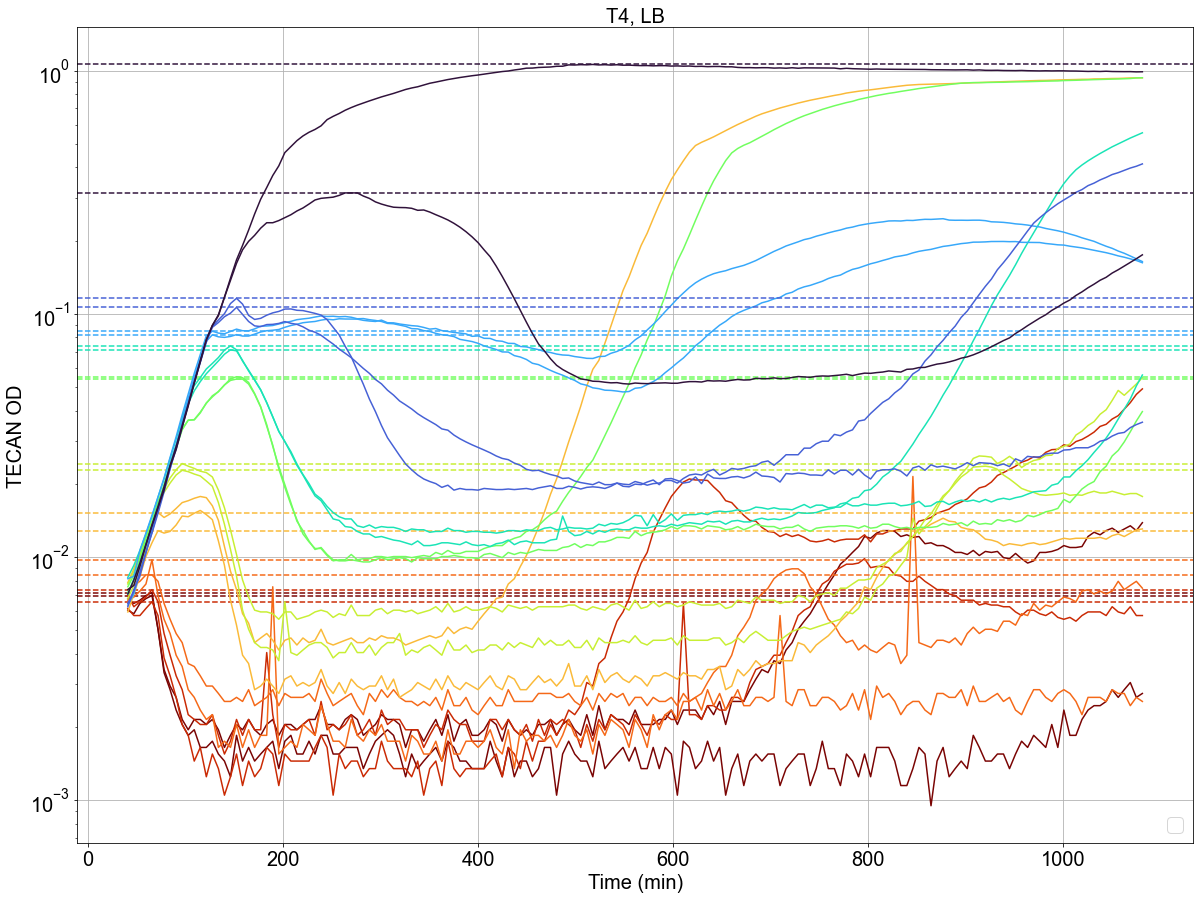

In [20]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})
'''
labels = ['3.4e8', '3.4e7', '3.4e6', '3.4e5',\
          '3.4e3','3.4e2', '3.4e1', '3.4e0', \
         '3.4e-1', '3.4e-2', 'uninfected']
'''

k = 0; 
for label_ in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_T4.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_T4.iloc[j][6:].to_numpy();
        
        if label_ < 2:
            y_tmp = y_[x_>100];
            y_tmp2 = y_[(x_>100) & (x_<600)];
            idx = np.argmax(y_tmp2);
        else:
            y_tmp = y_[x_>60]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            
        idx = idx + len(y_) - len(y_tmp);
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[label_] = OD; 
    time_01[label_] = time_;
    idx_01[label_] = indx_; 
    k = k+1; 
plt.title('T4, LB')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.013579211715006827
0.0013513873371030246
=====
0.11598021575551275
0.007578426385169289


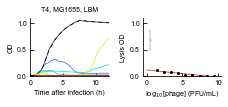

In [27]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3d.xlsx")
writer = pd.ExcelWriter("../output/Sfig3d.xlsx", engine = 'xlsxwriter')
########################################

def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################

phage_range = np.arange(9,-1,-1);
for i in phage_range:
    phage = 2.8*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ###################################
        plty_all = np.array([]);
        ###################################
        
        for j in OD_01[i]:  
            
            ###################################
            plty_all = np.append(plty_all, j);
            ###################################
            
            if i < 1:
                y_all = np.append(y_all, j);
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i < 1:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2,zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        
        ###################################
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ###################################

df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', 'Lysis OD (mean)','Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'd-right')

###################################
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('T4, MG1655, LBM')
x_ = df_T4.loc['Time'].to_numpy(); 

######################################    
dftmptmp = pd.DataFrame();
######################################   

for j in ['C5','C6']:
    y_ = df_T4.loc[j].to_numpy(); 
    if j == 'C5':
        
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################  
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_T4.iloc[j].to_numpy();
        
        ######################################    
        phage = 2.8*np.power(10,k)/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ###################################### 
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.1))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3d.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'd-left') 
writer.close()

## T5

For T5, the stock level is 8.3e10 PFU/mL, then 10-fold down [1.6e9, 1.6e8, 1.6e7, 1.6e6, 1.6e5, 1.6e4]

For P1, the stock level is 2.8e10 PFU/mL, then 10-fold down [5.5e8, 5.5e7, 5.5e6, 5.5e5, 5.5e4]

No handles with labels found to put in legend.


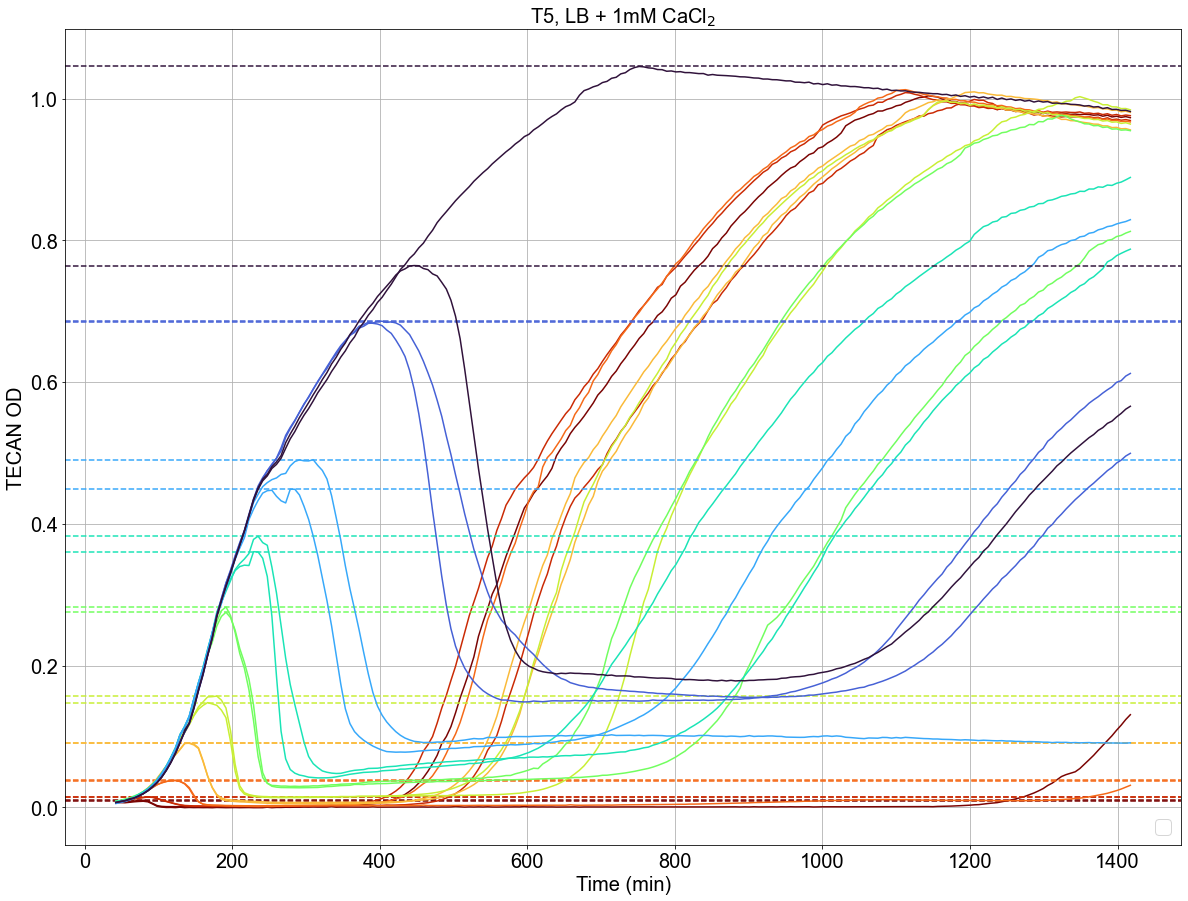

In [28]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for label_ in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_T5.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_T5.iloc[j][6:].to_numpy();
        
        if label_ < 10:
            y_tmp = y_[x_>60]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            if label_ == 3:
                y_tmp2 = y_[(x_>210)&(x_<400)]; 
                y_tmp = y_[x_>210]; 
                idx = argmax(y_tmp2);
            if label_ <= 2:
                y_tmp2 = y_[(x_>210)&(x_<900)]; 
                y_tmp = y_[x_>210]; 
                idx = argmax(y_tmp2);
        else:
            y_tmp = y_[x_>80]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp);
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[label_] = OD; 
    time_01[label_] = time_;
    idx_01[label_] = indx_; 
    k = k+1; 
plt.title('T5, LB + 1mM CaCl$_{2}$')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
#plt.ylim((1e-3,10))
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.08980436782187821
0.00473032990347475
=====
0.6554270921609211
0.021719030232967423


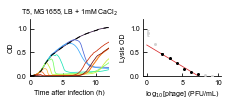

In [29]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3e.xlsx")
writer = pd.ExcelWriter("../output/Sfig3e.xlsx", engine = 'xlsxwriter')

########################################


def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 

matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################

for i in phage_range:
    phage = 1.63*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ######################################    
        plty_all = np.array([]);
        ######################################    
        
        for j in OD_01[i]:   
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################   
            
            if i > 7 or i <2:
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i > 7 or i <2:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2,zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################   
        
######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################    

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('T5, MG1655, LB + 1mM CaCl$_{2}$')
x_ = df_T5.loc['Time'].to_numpy(); 

######################################    
dftmptmp = pd.DataFrame();
######################################  

for j in ['C5','C6']:
    y_ = df_T5.loc[j].to_numpy(); 
    if j == 'C5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ###################################### 
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_T5.iloc[j].to_numpy();
        
        ######################################    
        phage = 1.63*10**k/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################  
        
        if j == 'F1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3e.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## P1

For T5, the stock level is 8.3e10 PFU/mL, then 10-fold down [1.6e9, 1.6e8, 1.6e7, 1.6e6, 1.6e5, 1.6e4]

For P1, the stock level is 2.8e10 PFU/mL, then 10-fold down [5.5e8, 5.5e7, 5.5e6, 5.5e5, 5.5e4]

No handles with labels found to put in legend.


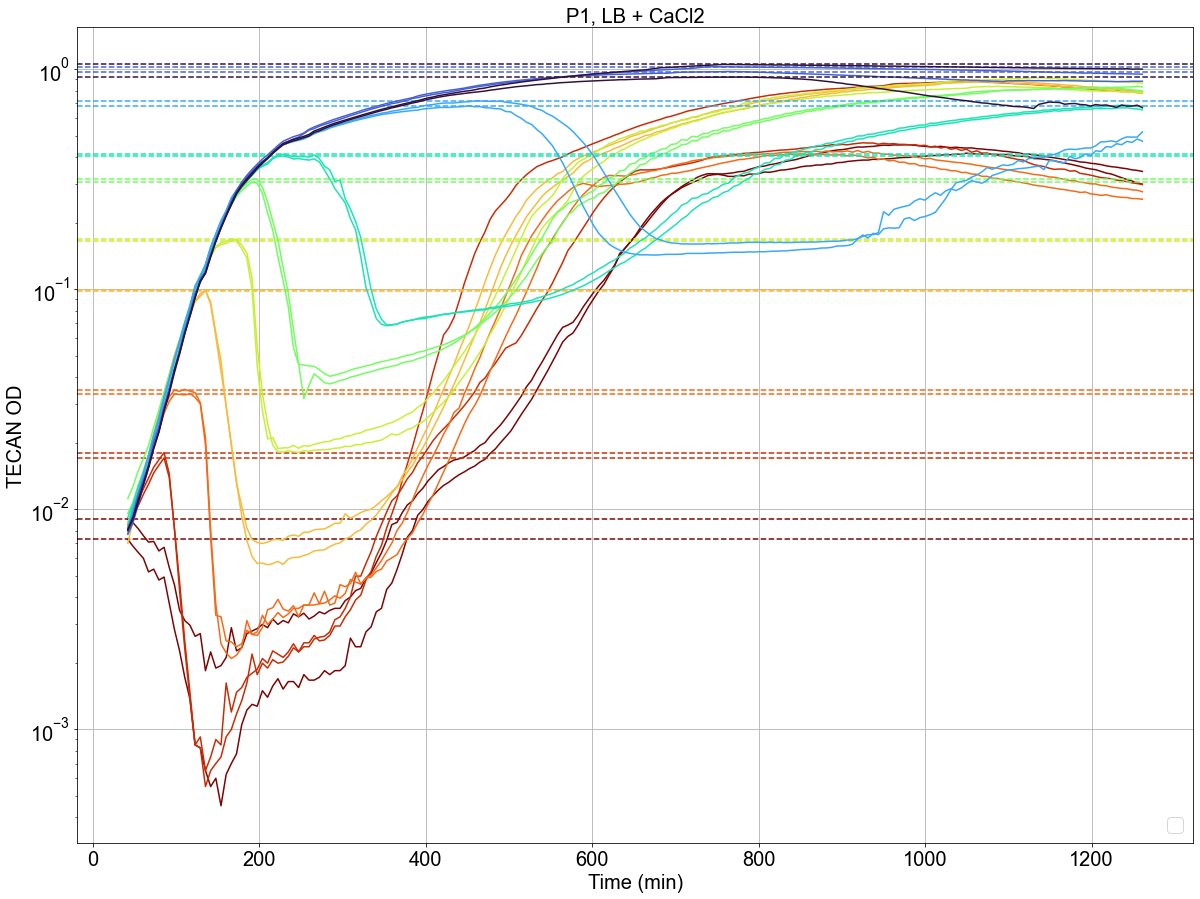

In [30]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})
'''
labels = ['3.4e8', '3.4e7', '3.4e6', '3.4e5',\
          '3.4e3','3.4e2', '3.4e1', '3.4e0', \
         '3.4e-1', '3.4e-2', 'uninfected']
'''

k = 0; 
for label_ in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_P1.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_P1.iloc[j][6:].to_numpy();
        
        if label_ < 11:
            y_tmp = y_[x_>40]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
            if label_ == 3:
                y_tmp2 = y_[(x_>210)&(x_<400)]; 
                y_tmp = y_[x_>210]; 
                idx = argmax(y_tmp2);
            if label_ <= 2:
                y_tmp2 = y_[(x_>210)&(x_<900)]; 
                y_tmp = y_[x_>210]; 
                idx = argmax(y_tmp2);
        else:
            y_tmp = y_[x_>80]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp);
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[label_] = OD; 
    time_01[label_] = time_;
    idx_01[label_] = indx_; 
    k = k+1; 
plt.title('P1, LB + CaCl2')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.20417964581400594
0.022326944826514507
=====
1.068260209377629
0.0710500822732788


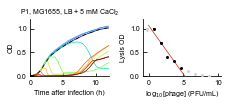

In [32]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3f.xlsx")
writer = pd.ExcelWriter("../output/Sfig3f.xlsx", engine = 'xlsxwriter')
########################################

def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 


matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################

for i in phage_range:
    phage = 0.549*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ######################################    
        plty_all = np.array([]);
        ######################################   
        
        for j in OD_01[i]: 
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################    
            
            if i < 1 or i > 5:
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i < 1 or i > 5:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2,zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################    

######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################    

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################
    
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('P1, MG1655, LB + 5 mM CaCl$_2$')
x_ = df_P1.loc['Time'].to_numpy(); 


######################################    
dftmptmp = pd.DataFrame();
######################################  

for j in ['C5','C6']:
    y_ = df_P1.loc[j].to_numpy(); 
    if j == 'C5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################   
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_P1.iloc[j].to_numpy();
        
        ######################################    
        phage = 5.5*10**k/100; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ###################################### 
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3f.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## M9Mal

No handles with labels found to put in legend.


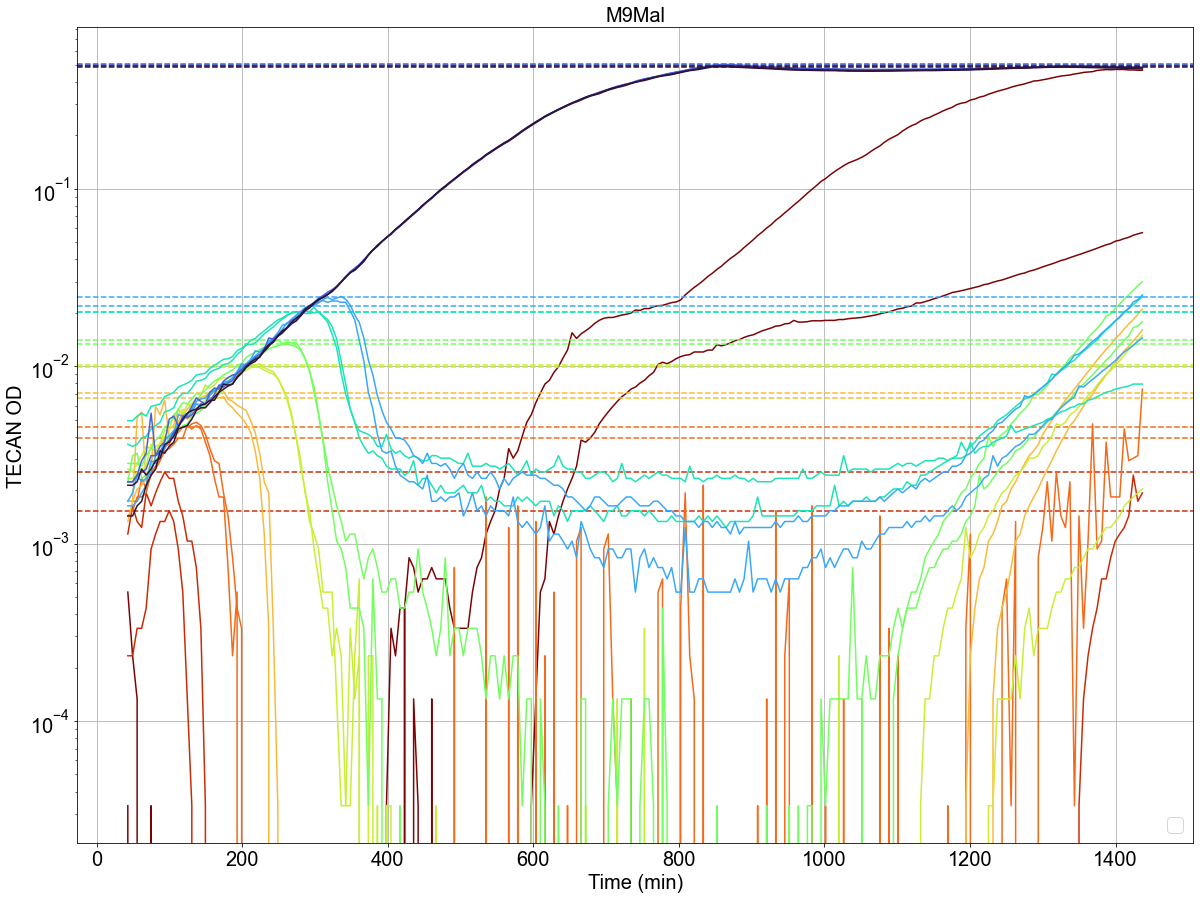

In [33]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_mal.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_mal.iloc[j][6:].to_numpy();
        
        if i == 8:
            y_tmp2 = y_[x_>90]; 
        elif i == 7:
            y_tmp2 = y_[x_>100]; 
        elif i == 6:
            y_tmp2 = y_[x_>150]; 
        elif i == 5:
            y_tmp2 = y_[x_>200]; 
        elif i == 4:
            y_tmp2 = y_[x_>240]; 
        elif i == 3 or i == 2:
            y_tmp2 = y_[x_>280]; 
        elif i == 1:
            y_tmp2 = y_[x_>350]; 
        else:
            y_tmp2 = y_[x_>350];
        
        idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('M9Mal')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.17283542587851614
0.01646497068728347
=====
-1.2167790361570436
0.0749712360667392


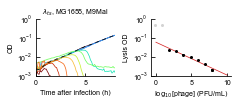

In [39]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3i.xlsx")
writer = pd.ExcelWriter("../output/Sfig3i.xlsx", engine = 'xlsxwriter')
########################################


def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(8,-1,-1); 


matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################
for i in phage_range:
    phage = 0.74*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ######################################    
        plty_all = np.array([]);
        ######################################  
        
        for j in OD_01[i]: 
            
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################  
            
            if i <2 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <2:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################  

######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################    

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = np.log10(y_data)
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, np.power(10, linear(xdata, np.mean(k_), np.mean(b_))),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################


plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.yscale('log')
plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.minorticks_off()

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{ts}$, MG1655, M9Mal')
x_ = df_mal.loc['Time'].to_numpy(); 



######################################    
dftmptmp = pd.DataFrame();
######################################   

for j in ['C5','C6']:
    y_ = df_mal.loc[j].to_numpy(); 
    if j == 'C5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################  
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_mal.iloc[j].to_numpy();
        
        ######################################    
        phage = 0.74*10**k/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################  
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,480/60))
plt.yscale('log')
plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.minorticks_off()
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3i.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## M9Glu

No handles with labels found to put in legend.


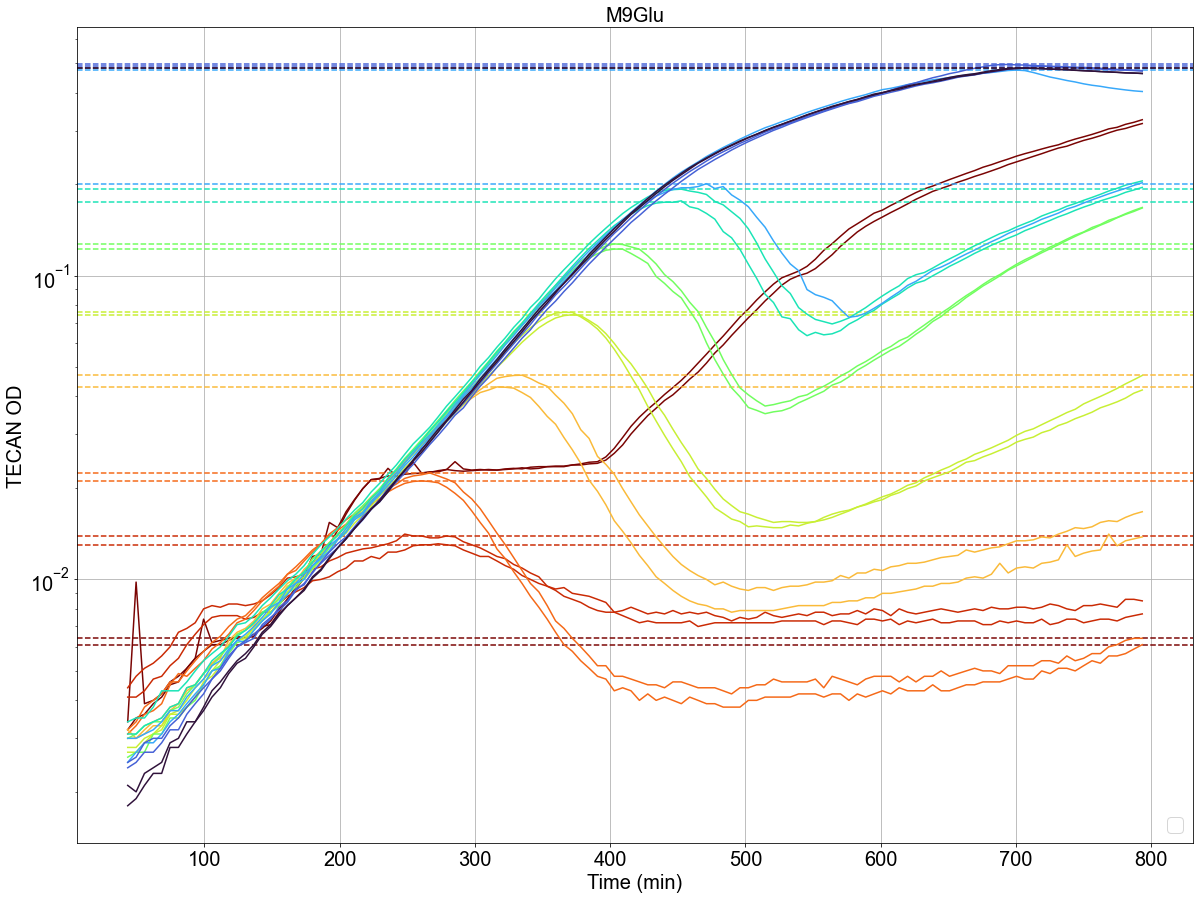

In [40]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_glu.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_glu.iloc[j][6:].to_numpy();
        
        if i == 9:
            y_tmp0 = y_[(x_>105) & (x_ < 200)]; 
            y_tmp2 = y_[(x_>105)]
            idxt = argrelextrema(y_tmp0, np.greater_equal)[0][0];
        elif i == 8:
            y_tmp2 = y_[x_>250]; 
            idxt = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>200]; 
            idxt = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        
        idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('M9Glu')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.23258773814153796
0.009202085829424167
=====
-0.05074731526729023
0.05661798817779264


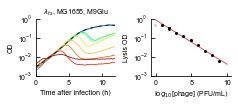

In [41]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3h.xlsx")
writer = pd.ExcelWriter("../output/Sfig3h.xlsx", engine = 'xlsxwriter')
########################################


def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 


matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################
for i in phage_range:
    phage = 0.74*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        
        ######################################    
        plty_all = np.array([]);
        ######################################    
        for j in OD_01[i]:   
            
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################  
            
            if i <1 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <1:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ###################################### 
        
######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################   

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = np.log10(y_data)
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, np.power(10, linear(xdata, np.mean(k_), np.mean(b_))),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

#popt, pcov = curve_fit(linear, x_data[:-1], np.log10(y_data[:-1]))
#xdata = np.linspace(0, 10, 1000); 
#plt.plot(xdata, np.power(10, linear(xdata, *popt)),linewidth=1.5, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')

#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.yscale('log')
plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.minorticks_off()

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{ts}$, MG1655, M9Glu')
x_ = df_glu.loc['Time'].to_numpy(); 

######################################    
dftmptmp = pd.DataFrame();
######################################    

for j in ['C5','C6']:
    y_ = df_glu.loc[j].to_numpy(); 
    if j == 'C5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################  
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_glu.iloc[j].to_numpy();
        
        ######################################    
        phage = 0.74*10**k/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################   
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.yscale('log')
plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
ax.minorticks_off()
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3h.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## TBM

No handles with labels found to put in legend.


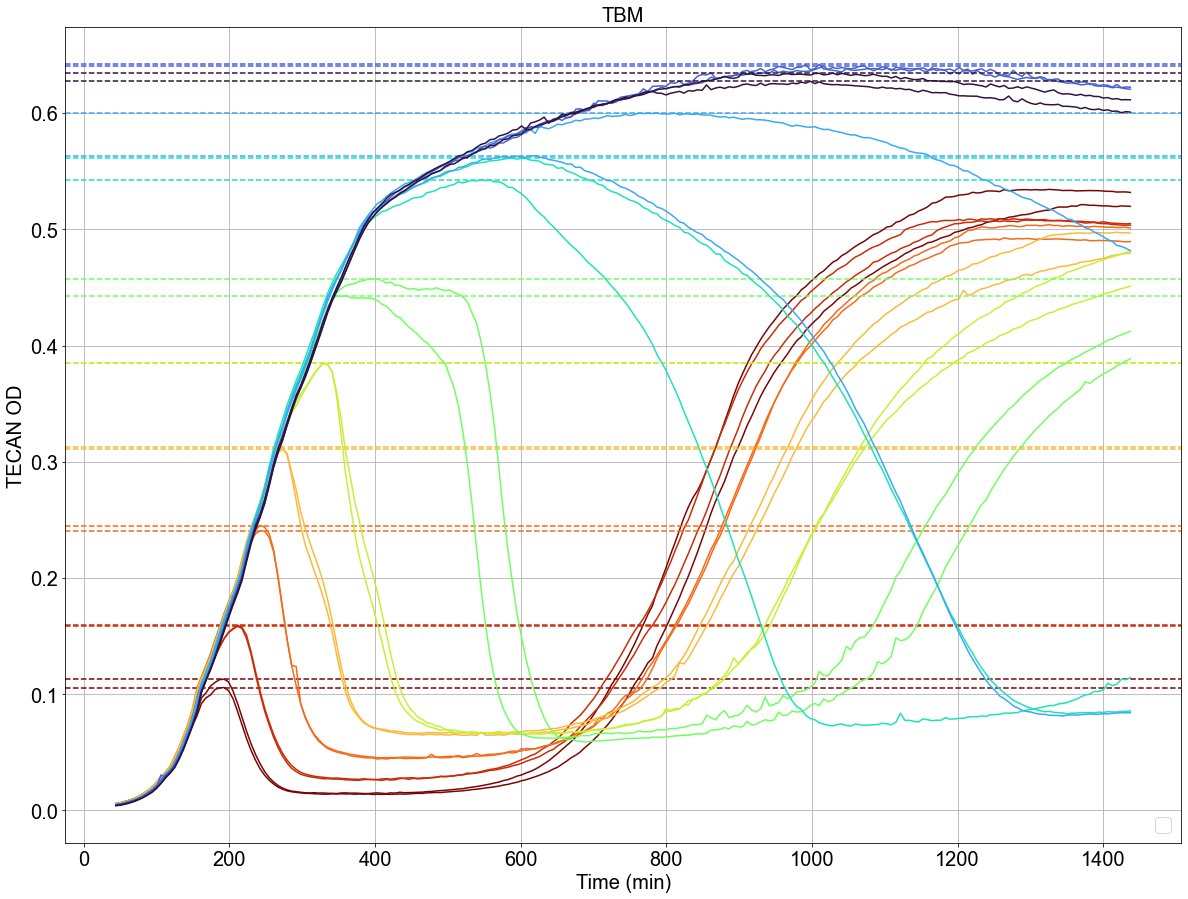

In [42]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_TBM.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_TBM.iloc[j][6:].to_numpy();
        
        if i > 3:
            y_tmp2 = y_[x_>150]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>150]; 
            idx = np.argmax(y_tmp2);
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('TBM')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.06930256930138946
0.0016656482139477922
=====
0.71901340697457
0.011180523036297577


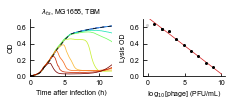

In [43]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3g.xlsx")
writer = pd.ExcelWriter("../output/Sfig3g.xlsx", engine = 'xlsxwriter')
########################################

def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 


matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 
###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################
for i in phage_range:
    phage = 0.74*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        ######################################    
        plty_all = np.array([]);
        ######################################  
        for j in OD_01[i]:   
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################    
            if i <1 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <1:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################    

######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################    
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################
            
#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,0.7))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{ts}$, MG1655, TBM')
x_ = df_TBM.loc['Time'].to_numpy(); 
######################################    
dftmptmp = pd.DataFrame();
######################################  

for j in ['C5','C6']:
    y_ = df_TBM.loc[j].to_numpy(); 
    if j == 'C5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################    
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_TBM.iloc[j].to_numpy();
        
        ######################################    
        phage = 0.74*10**k/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################   
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,0.7))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3g.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## N-, LE392

No handles with labels found to put in legend.


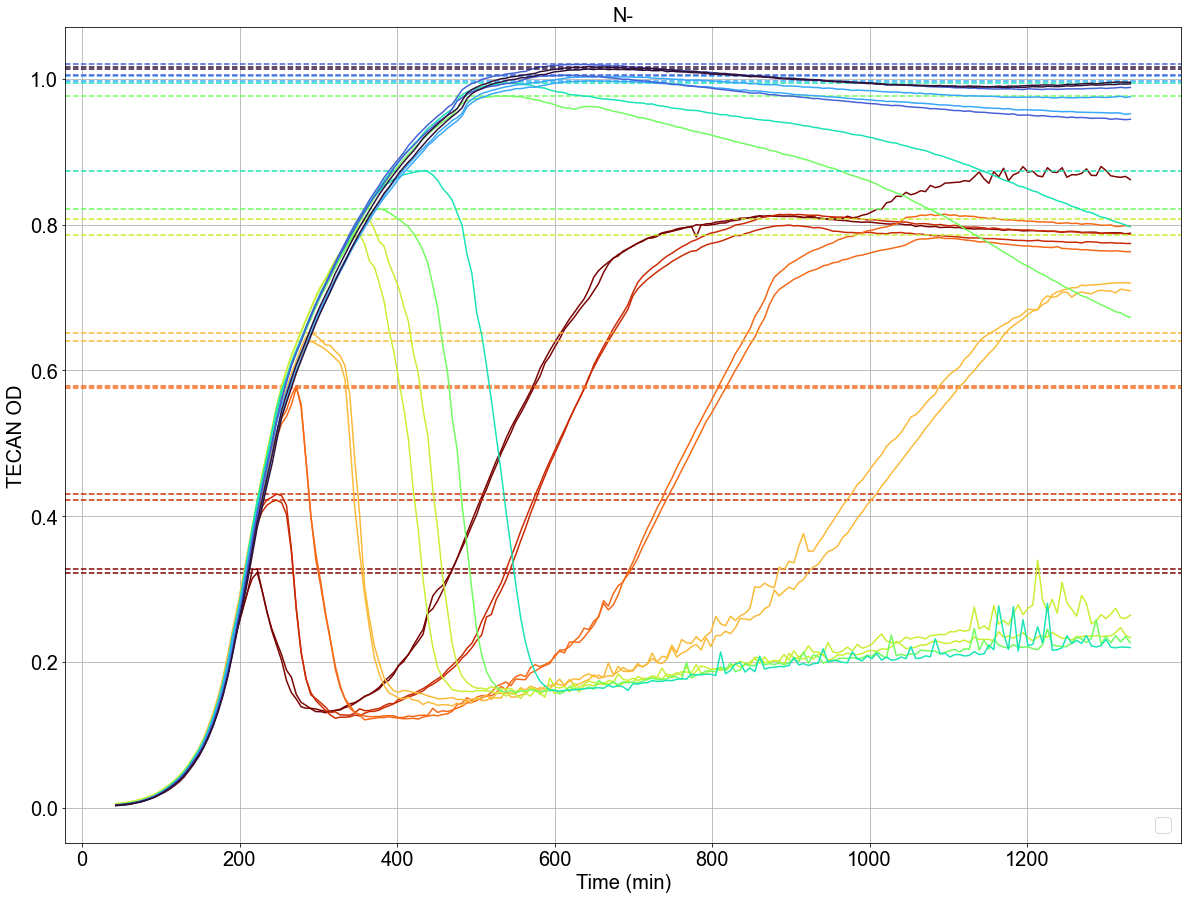

In [77]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(7,-3,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_N.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_N.iloc[j][6:].to_numpy();
        
        if i > 3:
            y_tmp2 = y_[x_>150]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>150]; 
            idx = np.argmax(y_tmp2);
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('N-')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.10697610901580154
0.007716583397812153
=====
1.0988127932335097
0.042315747613152724


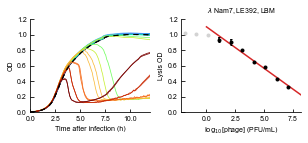

In [78]:
def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(7,-3,-1); 

matplotlib.rcParams.update({"figure.figsize": (4.2,2)})
ax = plt.subplot(1,2,2)
plt.title('$\lambda$ Nam7, LE392, LBM')
x_data = np.array([]);
y_data = np.array([]); 
for i in phage_range:
    if i < 0:
        phage = 1.3/np.power(10,-i); 
    else:
        phage = 1.3*np.power(10,i); 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        for j in OD_01[i]:   
            if i <1 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <1:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=3, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=3,zorder=15)

###################################
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=1.5, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
plt.xlim((-2.2,8.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
x_ = df_N.loc['Time'].to_numpy(); 

for j in ['C5','C6']:
    y_ = df_N.loc[j].to_numpy(); 
    if j == 'C5':
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    else:
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in j_index:
        y_ = df_N.iloc[j].to_numpy();
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
#plt.savefig('SFig/fS3_cali_N.pdf', format='pdf', bbox_inches='tight')

## S-, LE392

No handles with labels found to put in legend.


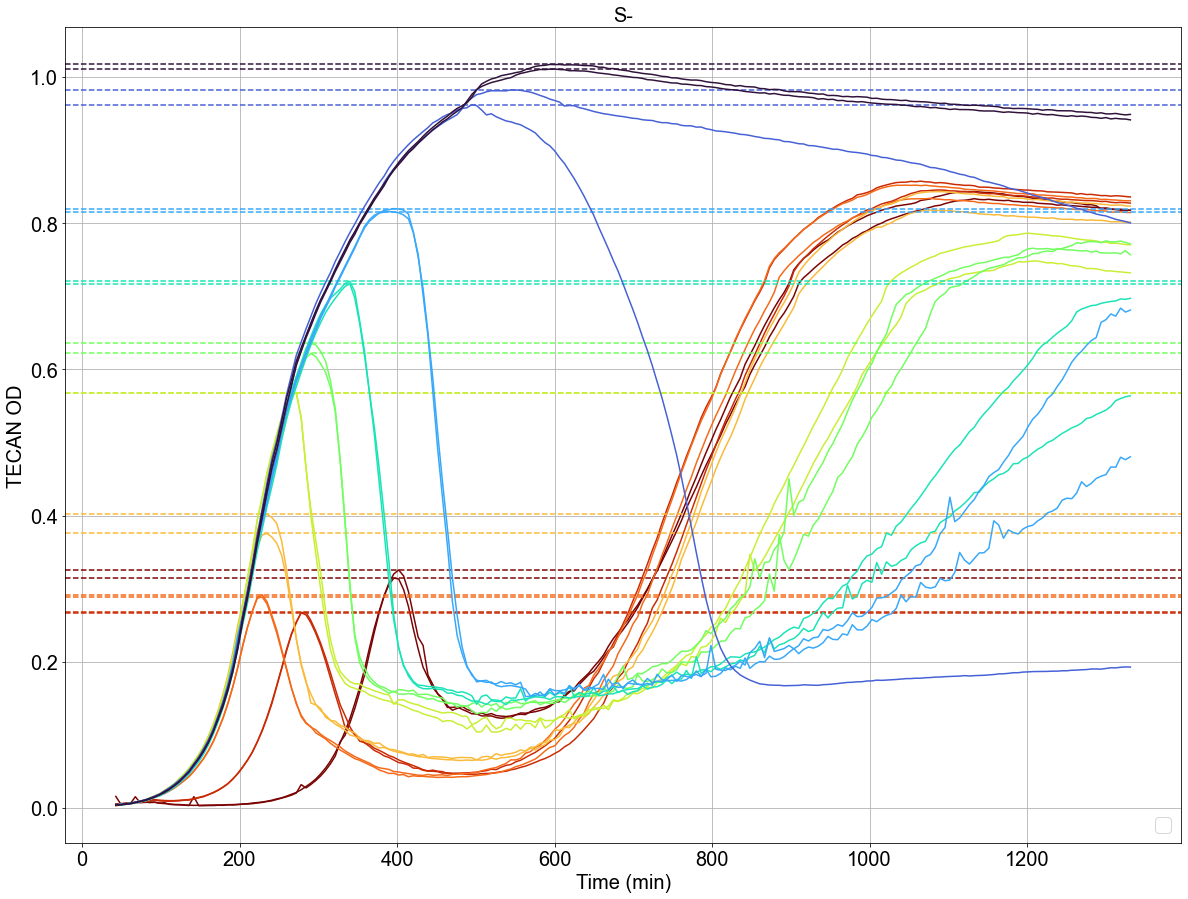

In [79]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_S.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_S.iloc[j][6:].to_numpy();
        
        if i == 9:
            y_tmp2 = y_[x_>300]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        elif i > 3:
            y_tmp2 = y_[x_>150]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>150]; 
            idx = np.argmax(y_tmp2);
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('S-')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.10498931435975195
0.0032632053956487316
=====
1.0268531516250428
0.012932353931559717


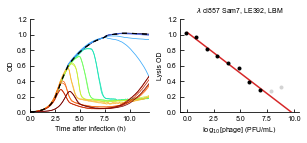

In [80]:
def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 

matplotlib.rcParams.update({"figure.figsize": (4.2,2)})
ax = plt.subplot(1,2,2)
plt.title('$\lambda$ cI857 Sam7, LE392, LBM')
x_data = np.array([]);
y_data = np.array([]); 
for i in phage_range:
    if i < 0:
        phage = 0.7/np.power(10,-i); 
    else:
        phage = 0.7*np.power(10,i); 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        for j in OD_01[i]:   
            if i > 7 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i > 7:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=3, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=3,zorder=15)
    
###################################
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=1.5, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

    
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
#plt.xlim((-2.2,8.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
x_ = df_S.loc['Time'].to_numpy(); 

for j in ['F5','F6']:
    y_ = df_S.loc[j].to_numpy(); 
    if j == 'F5':
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    else:
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in j_index:
        y_ = df_S.iloc[j].to_numpy();
        if j == 'F1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
#plt.savefig('SFig/fS3_cali_S.pdf', format='pdf', bbox_inches='tight')

## P-, LE392

No handles with labels found to put in legend.


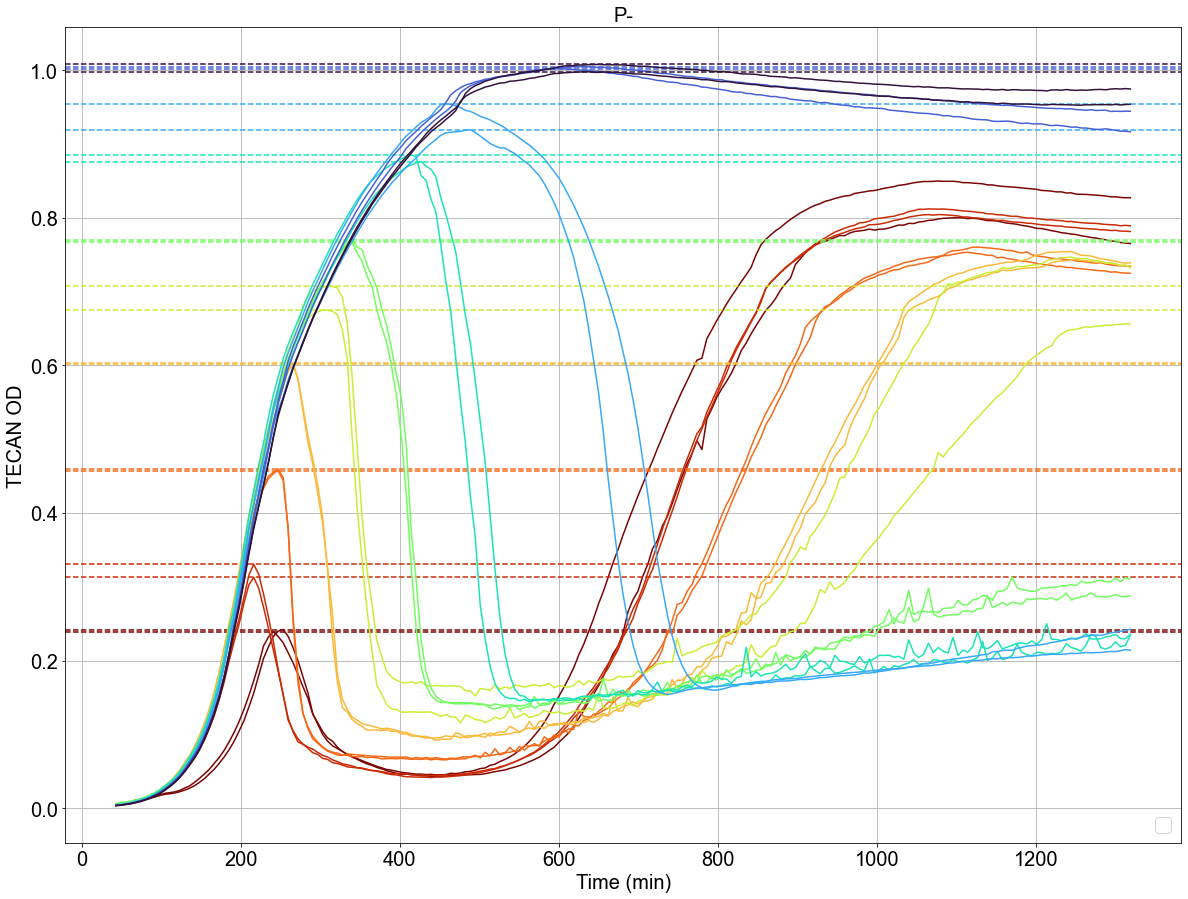

In [81]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(8,-2,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_PMinus.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_PMinus.iloc[j][6:].to_numpy();
        
        if i > 3:
            y_tmp2 = y_[x_>150]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>150]; 
            idx = np.argmax(y_tmp2);
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('P-')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.0986603349672126
0.0035559267488755692
=====
1.0705544341295063
0.01811152973456304


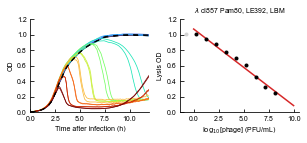

In [82]:
def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(8,-2,-1); 

matplotlib.rcParams.update({"figure.figsize": (4.2,2)})
ax = plt.subplot(1,2,2)
plt.title('$\lambda$ cI857 Pam80, LE392, LBM')
x_data = np.array([]);
y_data = np.array([]); 
for i in phage_range:
    if i < 0:
        phage = 1.54/np.power(10,-i); 
    else:
        phage = 1.54*np.power(10,i); 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        for j in OD_01[i]:   
            if i <0 :
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <0:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=3, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=3,zorder=15)
    
###################################
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data
    y_all = y_data
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=1.5, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
#plt.xlim((-2.2,8.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
x_ = df_PMinus.loc['Time'].to_numpy(); 

for j in ['C5','C6']:
    y_ = df_PMinus.loc[j].to_numpy(); 
    if j == 'C5':
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    else:
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in j_index:
        y_ = df_PMinus.iloc[j].to_numpy();
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
#plt.savefig('SFig/fS3_cali_P.pdf', format='pdf', bbox_inches='tight')

## P+, LE392

No handles with labels found to put in legend.


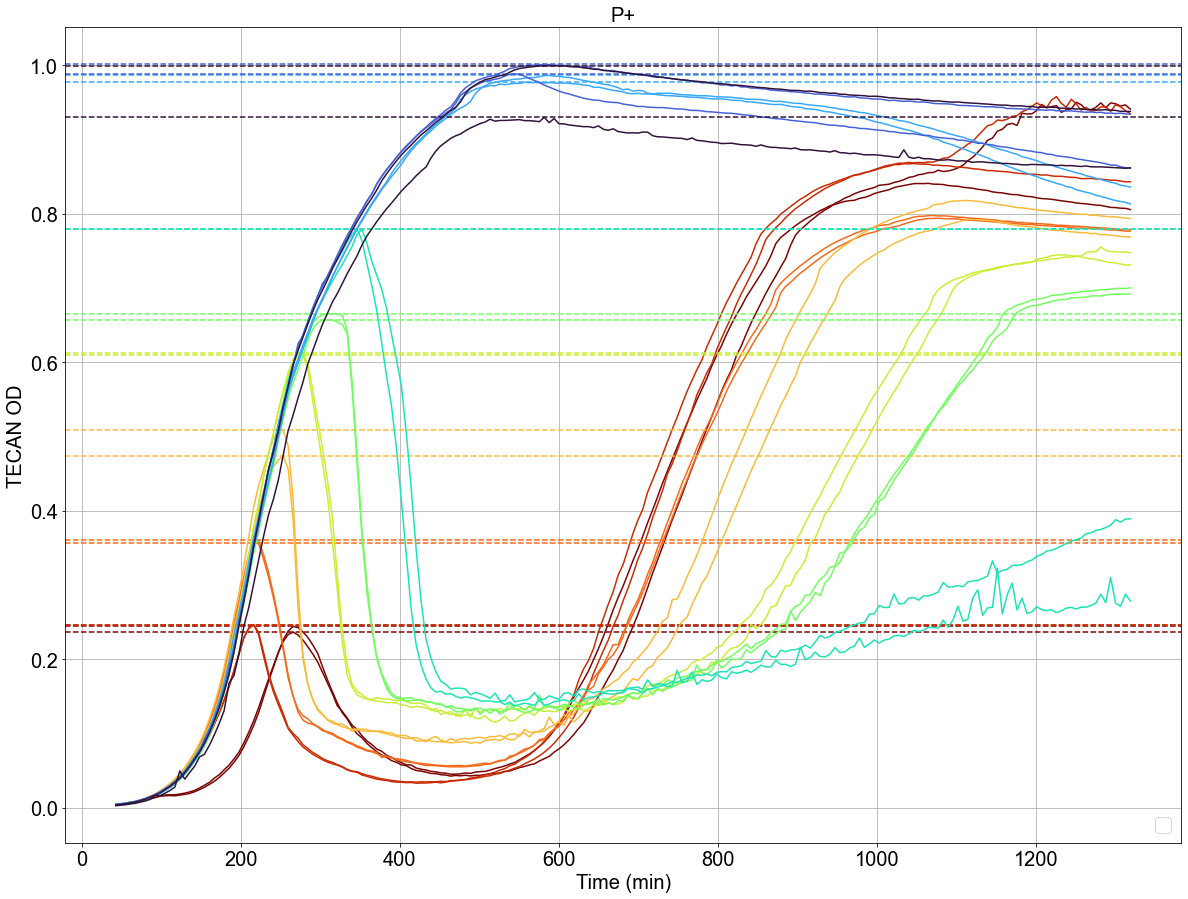

In [44]:
OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})

k = 0; 
for i in np.arange(9,-1,-1):
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    j_index = np.array([2*k, 2*k+1]);
    
    for j in j_index:
        x_ = (df_PPlus.loc['Time'].to_numpy())[6:] # - df_T4.loc['Time'].to_numpy()[6])/60
        y_ = df_PPlus.iloc[j][6:].to_numpy();
        
        if i > 3:
            y_tmp2 = y_[x_>150]; 
            idx = argrelextrema(y_tmp2, np.greater_equal)[0][0];
        else:
            y_tmp2 = y_[x_>150]; 
            idx = np.argmax(y_tmp2);
        idx = idx + len(y_) - len(y_tmp2);
        
        #print(colors[k,:])
        plt.plot(x_, y_, color = colors[k,:])
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
plt.title('P+')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
#plt.yscale('log')
plt.grid(True)
plt.legend(ncol=2, loc='lower right')

-0.11426097714531028
0.004953149226525919
=====
1.1463721325195244
0.031100509879632685


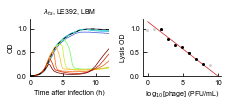

In [45]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3c.xlsx")
writer = pd.ExcelWriter("../output/Sfig3c.xlsx", engine = 'xlsxwriter')
########################################

def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(9,-1,-1); 

matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 
###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################
for i in phage_range:
    if i < 0:
        phage = 0.74/np.power(10,-i); 
    else:
        phage = 0.74*np.power(10,i); 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        ######################################    
        plty_all = np.array([]);
        ######################################    
        for j in OD_01[i]:   
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################  
            
            if i <2 or i > 8:
                y_all = np.append(y_all, j);
                #plt.plot(np.log10(phage), j, 'o', markersize=2.5, color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i <2 or i > 8:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='lightgray',markersize=2, zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################    
        
######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################  

from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################

plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.2))
#plt.xlim((-2.2,8.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{ts}$, LE392, LBM')
x_ = df_PPlus.loc['Time'].to_numpy(); 

######################################    
dftmptmp = pd.DataFrame();
######################################    

for j in ['F5','F6']:
    y_ = df_PPlus.loc[j].to_numpy(); 
    if j == 'F5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ######################################  
        
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for k in np.arange(10,0,-1):
    j_index = np.array([2*k, 2*k+1]);
    for j in [j_index[0]]:
        y_ = df_PPlus.iloc[j].to_numpy();
        ######################################    
        phage = 0.74*10**k/10; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################  
        
        if j == 'F1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[k-1,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,720/60))
plt.ylim((0,1.2))
#plt.yscale('log')
#plt.ylim((1e-3,1e-0))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3c.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()

## lambda_ts, MG1655, LBM

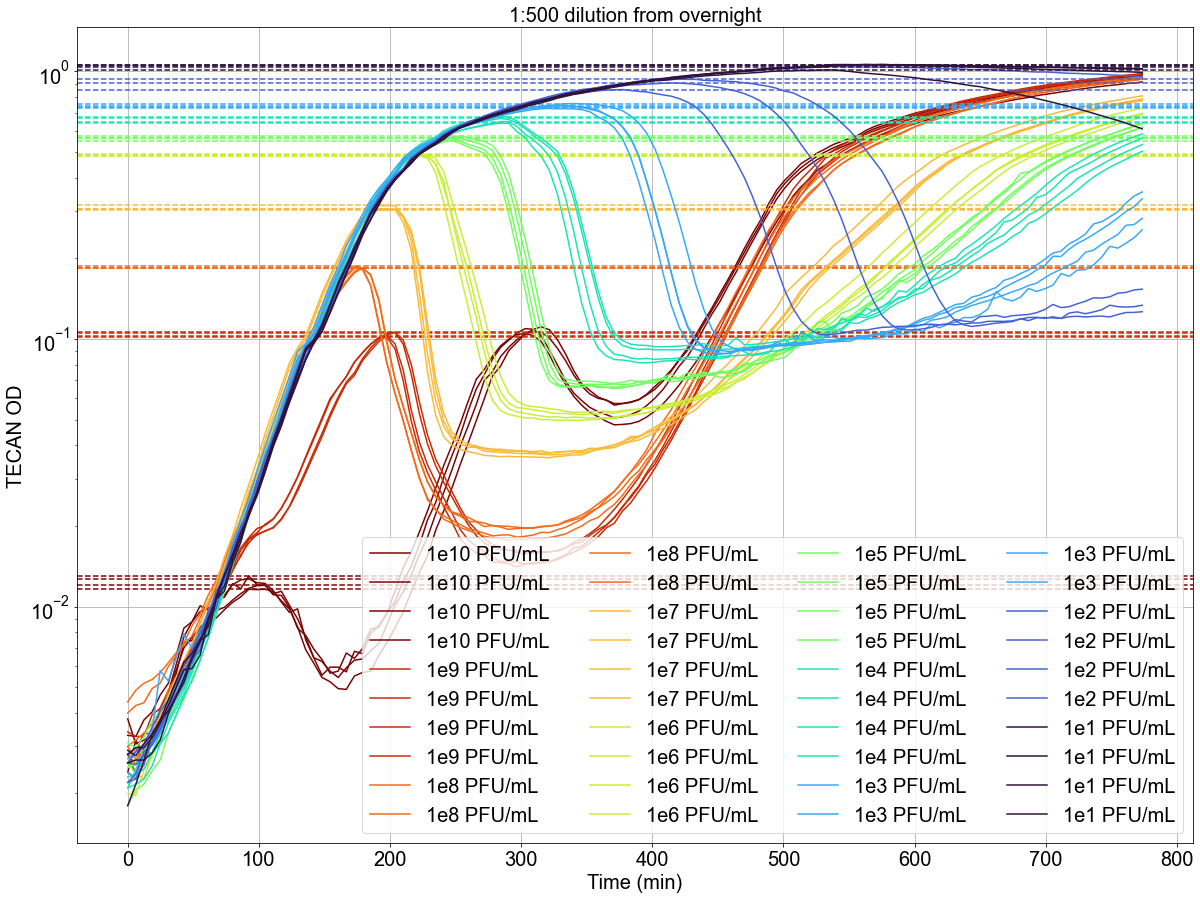

In [46]:
df=pd.read_csv('../data/TECAN_230114.csv',delimiter=',',index_col=0)  
#time = df.to_numpy()[0]/60

ydata1 = df.loc['E7'].to_numpy()
ydata2 = df.loc['E8'].to_numpy()
ydata3 = df.loc['F7'].to_numpy()
ydata4 = df.loc['F8'].to_numpy()

ymean = (ydata1+ydata2+ydata3)/3; 


my_dict = {'1e10':['A1','A2','B1','B2'],
          '1e9':['A3','A4','B3','B4'],
          '1e8':['A5','A6','B5','B6'],
          '1e7':['A7','A8','B7','B8'],
          '1e6':['C1','C2','D1','D2'],
          '1e5':['C3','C4','D3','D4'],
          '1e4':['C5','C6','D5','D6'],
          '1e3':['C7','C8','D7','D8'],
          '1e2':['E1','E2','F1','F2'],
          '1e1':['E3','E4','F3','F4']}
labels = list(my_dict.keys())

OD_01 = {};
time_01= {}; 
idx_01 = {};

k = 0; 
i = 10; 
fontSize=20
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
matplotlib.rcParams.update({"figure.figsize": (20,15)})
for label_ in labels:
    OD = np.array([]);
    time_ = np.array([]);
    indx_ = np.array([]); 
    for j in my_dict[label_]:
        x_ = df.to_numpy()[0]/60
        y_ = df.loc[j].to_numpy() - ymean
        if i < 8:
            y_tmp = y_[x_>150]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        else:
            y_tmp = y_[x_>80]; 
            idx = argrelextrema(y_tmp, np.greater_equal)[0][0];
        idx = idx + len(y_) - len(y_tmp);
        plt.plot(x_, y_, color = colors[k,:], label='1e'+str(i)+' PFU/mL')
        plt.axhline(y_[idx], color = colors[k,:], linestyle = '--')
        OD = np.append(OD, y_[idx]);
        time_ = np.append(time_, x_[idx]);
        indx_ = np.append(indx_, idx);
    OD_01[i] = OD; 
    time_01[i] = time_;
    idx_01[i] = indx_; 
    k = k+1; 
    i = i-1;
plt.title('1:500 dilution from overnight')
plt.xlabel('Time (min)')
plt.ylabel('TECAN OD')
plt.yscale('log')
plt.grid(True)
plt.legend(ncol=4)

-0.1152430576077138
0.0021153611525000864
=====
1.1463108054559839
0.015507771478545125


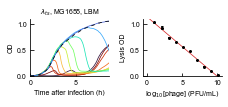

In [47]:
import xlsxwriter

# Create a workbook and add a worksheet.
workbook = xlsxwriter.Workbook("../output/Sfig3a.xlsx")
writer = pd.ExcelWriter("../output/Sfig3a.xlsx", engine = 'xlsxwriter')
########################################


def linear(x,k,b):
    return k*x + b

fontSize=7
matplotlib.rcParams.update({"axes.formatter.limits": (-4,4),'font.family':'Arial','font.size': fontSize, "axes.titlesize": fontSize, "xtick.labelsize": fontSize, "ytick.labelsize": fontSize,})
plotStyles={"markersize":12,"markeredgewidth":2.0,"linewidth":2.0}
stepStyles={"markersize":15,"markeredgewidth":3.0,"linewidth":4.0,"where":"post"}
scatterStyles={"linewidth":1.0}
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

phage_range = np.arange(10,0,-1); 


matplotlib.rcParams.update({"figure.figsize": (3.15,1.5)})
ax = plt.subplot(1,2,2)
x_data = np.array([]);
y_data = np.array([]); 

###################################
pltx_data = np.array([]);
plty_data = np.array([]); 
plty_err_data = np.array([]); 
###################################
for i in phage_range:
    phage = 1.2*10**i; 
    if i == 11:
        next;
    else:
        y_all = np.array([]);
        ######################################    
        plty_all = np.array([]);
        ###################################### 
        for j in OD_01[i]:   
            ######################################    
            plty_all = np.append(plty_all, j);
            ######################################    
            if i < 1:
                plt.plot(np.log10(phage), j, 'o', markersize=2,color='lightgray')
            else:
                y_all = np.append(y_all, j);
                x_data = np.append(x_data, np.log10(phage))
                y_data = np.append(y_data, j)
        if i == 7:    
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,label='Experiment',zorder=15)
        else:
            plt.errorbar(np.log10(phage), np.mean(y_all), yerr=np.std(y_all)/2, capsize=1, fmt='o', color='k',markersize=2,zorder=15)
        ######################################    
        pltx_data = np.append(pltx_data, np.log10(phage))
        plty_data = np.append(plty_data, np.mean(plty_all))
        plty_err_data = np.append(plty_err_data, np.std(plty_all)/2)
        ######################################    

######################################            
df_tmptmp = pd.DataFrame({'log10 [PFU/mL]': pltx_data,\
                          'Lysis OD (mean)': plty_data, \
                          'Lysis OD (error)': plty_err_data}, \
                            columns=['log10 [PFU/mL]', \
                                     'Lysis OD (mean)',\
                                     'Lysis OD (error)' ])
df_tmptmp = df_tmptmp.T
df_tmptmp.to_excel(writer, sheet_name = 'right')
######################################    
from random import choices
Num = 1000; 
k_ = np.zeros(Num)
b_ = np.zeros(Num)
for N in range(Num):
    x_all = x_data#[:-1]
    y_all = y_data#[:-1]
    idx_ = np.arange(0,len(x_all),1); 
    
    idx_tmp = choices(idx_,k=len(idx_))
    
    popt_, pcov_ = curve_fit(linear, x_all[idx_tmp], y_all[idx_tmp])
    k_[N] = popt_[0]
    b_[N] = popt_[1]

print(np.mean(k_))
print(np.std(k_))
print('=====')
print(np.mean(b_))
print(np.std(b_))

xdata = np.linspace(0, 10, 1000); 
plt.plot(xdata, linear(xdata, np.mean(k_), np.mean(b_)),linewidth=0.75, color='tab:red', label='Linear fit')#, label='fit (slope = '+'{:.2f}'.format(popt[0])+'intersect='+'{:.2f}'.format(popt[1])+')')
####################################
#plt.legend(frameon=False)
plt.xlabel('$\log_{10}$[phage] (PFU/mL)')
plt.ylabel('Lysis OD')
plt.ylim((0,1.1))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")

ax = plt.subplot(1,2,1)
plt.title('$\lambda_{ts}$, MG1655, LBM')
x_ = df.iloc[0].to_numpy()/60
######################################    
dftmptmp = pd.DataFrame();
######################################   

for j in ['E5','E6','F5','F6']:
    y_ = df.loc[j].to_numpy() - ymean; 
    if j == 'E5':
        ######################################    
        dftmptmp['Time (h)'] = x_[6:]/60 - x_[6]/60;
        dftmptmp['Uninfected'] = y_[6:];
        ###################################### 
        plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=0.75,color='k',linestyle='--', dashes=(5, 5),label='Uninfected',zorder=15)
    #else:
    #    plt.plot(x_[6:]/60 - x_[6]/60, y_[6:],'-',linewidth=1,color='k',linestyle='--', dashes=(5, 5),zorder=15)
    
for i in phage_range:
#for i in np.array([1,2]):
    OD = np.array([]);
    time_ = np.array([]);
    for n in [3]:
        j = my_dict['1e'+str(i)][n];
        y_ = df.loc[j].to_numpy() - ymean;
        ######################################    
        phage = 2*10**i; 
        phage = "{:.1e}".format(phage)
        dftmptmp[phage] = y_[6:];
        ######################################  
        
        if j == 'C1':
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[9-i,:],label='Infected')
        else:
            plt.plot(x_[6:]/60 - x_[6]/60, y_[6:], linewidth=0.75,color = colors[9-i,:]); 

plt.tight_layout()
plt.xlabel('Time after infection (h)')
plt.ylabel('OD')
plt.xlim((0,520/60))
plt.ylim((0,1.1))
#plt.legend(frameon=False)
#ax.yaxis.tick_right()
#ax.yaxis.set_label_position("right")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.tick_params(axis="y",direction="in")
ax.tick_params(axis="x",direction="in")
#plt.savefig('poster1.eps', format='eps', bbox_inches='tight')
#plt.grid(True)
#plt.title('IG2903 in LBM')
plt.savefig('../output/Sfig3a.pdf', format='pdf', bbox_inches='tight')

######################################  
dftmptmp = dftmptmp.T
dftmptmp.to_excel(writer, sheet_name = 'left') 
writer.close()